#### K - Means Clustering

In [1]:
#https://www.udemy.com/course/machinelearning/learn/lecture/19509908#overview
#https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The mall contains information of its clients who subscribed to the  membership card, when the client subscribed for their
# card they provided their information (like CustomerID, Genre, Age, Annual Income).
# Because of this card the customers can buy all sorts of things in the mall and therefore the mall has a purchase history of
# each customer and thats how they obtain th last column(Spending Score(1-100)), 
# the  spending score is a score that the mall has computed for each of their clients based on several criteria for example 
# their Income, the no. of times they show up in the mall, the amount of dollars they spent in year etc., based on all this 
# they computed this metric(Spending Score) that takes values between 1-100.
# So that the closer the spending score is to 1 and less the clients spends and the closer the spending score is to 100
# and more the clients spends.

# And eventually after collecting the data the mall company asks u to segment their clients in to different groups based on the
# metrics (Annual Income and  Spending Score) 
# Since the mall has no idea of what this client segment might be or even has no idea about how many segments there would be,
# this is typically a clustering problem since we don't know the answers 
# So we use K-means algorithm to find what those cluster of clients might be.



In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X  = data.iloc[:,[3,4]].values
#here we using Annual income and Spending score to identify patterens in the dataset.
#there is no dependent variable appriori in a before we created a K-means algorithm
#Dependent variable will come when we train K-mean model on the datset

### Using the elbow method to find out the optimal number of clusters

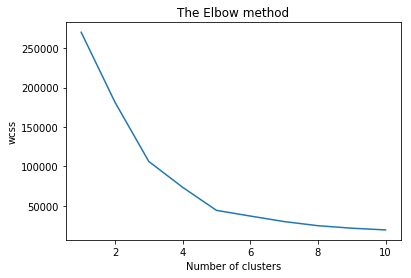

In [5]:
# elbow method is indeed absolutely necessary when training the k-means model on the dataset 
# when buliding the k-means model we have to specify the optimal number of clusters we wanna choose 

from sklearn.cluster import KMeans

# we'll start for loop which'll run the K-means algorithm with 10 different numbers of clusters
# very simply we'll run k-means algorithm for k = 1,2,3...10
# wcss = within cluster sum of squares(between the observation points in each cluster and centroid of the each cluster)
# to avoid random initialization trap we use a particular method which is " k-means++ "
# the way to get the wcss value is to call an attribute of kmeans object(objects in classes have attribute which can directly
# gives values u want ) which is called 'inertia'
 
wcss =[] #Initializing the list for the values of WCSS 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Training the K-Means model on the datset

In [6]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state=42)        # n_clusters = 5 taken from above elbow method plot
#so in training the kmeans model we need dependent variable to train the model
y_predict = kmeans.fit_predict(X)
print(y_predict)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [7]:
#so from y_predict we can see that CustomerID no 1 belongs to cluster 3 (from above output 2 means 3rd cluster,3 means
# 4rt cluster and so on , since here in python 1st column index position starts from 0)

In [8]:
prediction_output = pd.DataFrame(data = [data['CustomerID'],y_predict])
prediction_output.transpose().head()

,CustomerID,Unnamed 0
0,1,2
1,2,3
2,3,2
3,4,3
4,5,2


In [9]:
# From the above image, we can now relate that the CustomerID 1 belongs to a cluster3
# (as index starts from 0, hence 2 will be considered as 3), and 2 belongs to cluster 4, and so on.

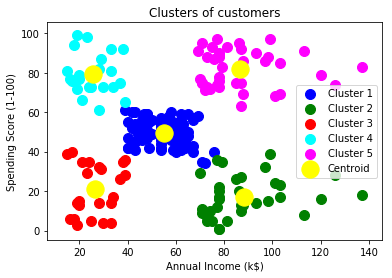

In [10]:
#visulaizing the clusters  
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

# In above lines of code, we have written code for each clusters, ranging from 1 to 5. 
# The first coordinate of the mtp.scatter, i.e., x[y_predict == 0, 0] containing the x value for the showing the matrix of
# features values, and the y_predict is ranging from 0 to 1.

* The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

* Cluster1 shows the customers with average salary and average spending so we can categorize these customers as
* Cluster2 shows the customer has a high income but low spending, so we can categorize them as careful.
* Cluster3 shows the low income and also low spending so they can be categorized as sensible.
* Cluster4 shows the customers with low income with very high spending so they can be categorized as careless.
* Cluster5 shows the customers with high income and high spending so they can be categorized as target, and these customers can
 be the most profitable customers for the mall owner.